In [1]:
import os
import numpy as np

In [2]:
logs_folder = 'logs/'

In [37]:
exp_names = ['mnist_rotation_one_by_nine_world_size_3',
            'mnist_rotation_one_by_nine_world_size_4',
            'mnist_rotation_one_by_nine_world_size_5',
            'mnist_rotation_three_by_nine_world_size_5',
            'mnist_rotation_five_by_nine_world_size_5',
            'mnist_rotation_seven_by_nine_world_size_5',
            'mnist_rotation_seven_by_nine_world_size_5_corruption_02',
            'mnist_rotation_seven_by_nine_world_size_5_corruption_04',
            'mnist_rotation_seven_by_nine_world_size_5_corruption_08']

In [38]:
exp_to_accuracies = {}

In [39]:
def get_accuracies(exp_name):
    world_size = int(exp_name.split('_corruption')[0].split('_')[-1])
    
    exp_ind = []
    exp_ood = []
    
    for rank in range(1,world_size):
        file_name = 'logs/%s_%s.out'%(exp_name, rank)
        with open(file_name, 'r') as F:
            contents = F.readlines()
        all_accuracies = []
        for c in contents:
            if 'Accuracy' in c:
                acc_value = float(c.rstrip().split(' ')[1])
                all_accuracies.append(acc_value)
        final_ood = all_accuracies[-1]
        final_ind = all_accuracies[-2]
        exp_ind.append(final_ind)
        exp_ood.append(final_ood)
        
    best_ind = np.max(exp_ind)
    best_ood = np.max(exp_ood)
    
    accs = {'ind':best_ind, 'ood':best_ood}
    return accs

In [40]:
for exp_name in exp_names:
    exp_to_accuracies[exp_name] = get_accuracies(exp_name)

In [41]:
exp_to_accuracies

{'mnist_rotation_one_by_nine_world_size_3': {'ind': 0.991, 'ood': 0.3943},
 'mnist_rotation_one_by_nine_world_size_4': {'ind': 0.9898, 'ood': 0.4067},
 'mnist_rotation_one_by_nine_world_size_5': {'ind': 0.9898, 'ood': 0.4011},
 'mnist_rotation_three_by_nine_world_size_5': {'ind': 0.9638, 'ood': 0.5946},
 'mnist_rotation_five_by_nine_world_size_5': {'ind': 0.9564, 'ood': 0.6477},
 'mnist_rotation_seven_by_nine_world_size_5': {'ind': 0.9478, 'ood': 0.611},
 'mnist_rotation_seven_by_nine_world_size_5_corruption_02': {'ind': 0.9521,
  'ood': 0.6522},
 'mnist_rotation_seven_by_nine_world_size_5_corruption_04': {'ind': 0.9552,
  'ood': 0.6513},
 'mnist_rotation_seven_by_nine_world_size_5_corruption_08': {'ind': 0.9493,
  'ood': 0.653}}

# Plotting

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
pal = sns.color_palette("dark", 11)

In [44]:
sns.set_palette(pal)

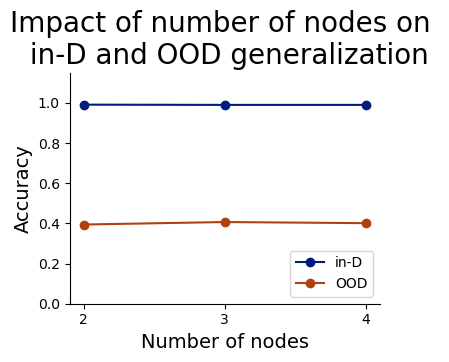

In [45]:
xs = [2,3,4]
ys = [0.991,0.9898,0.9898]
ys_ood = [0.3943,0.4067,0.4011]

fig = plt.figure(figsize=(4,3))
plt.plot(xs,ys, marker='o',label='in-D')
plt.plot(xs,ys_ood, marker='o', label = 'OOD')
plt.ylim(0,1.15)
plt.xticks([2,3,4])
sns.despine()
plt.title('Impact of number of nodes on \n in-D and OOD generalization', fontsize=20)
plt.xlabel('Number of nodes', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc="lower right")
plt.show()

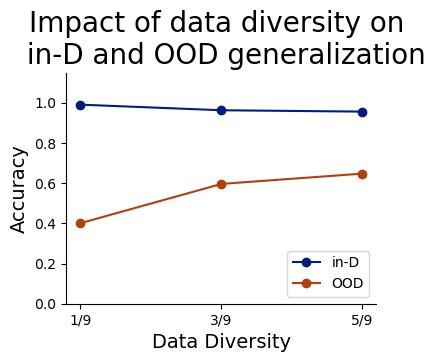

In [46]:
xs = [1,2,3]
ys = [0.991,0.9632,0.9564]
ys_ood = [0.4011,0.5964,0.6477]

fig = plt.figure(figsize=(4,3))
plt.plot(xs,ys, marker='o',label='in-D')
plt.plot(xs,ys_ood, marker='o', label = 'OOD')
plt.ylim(0,1.15)
plt.xticks([1,2,3],labels = ['1/9','3/9','5/9'])
sns.despine()
plt.title('Impact of data diversity on \n in-D and OOD generalization', fontsize=20)
plt.xlabel('Data Diversity', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc="lower right")
plt.show()

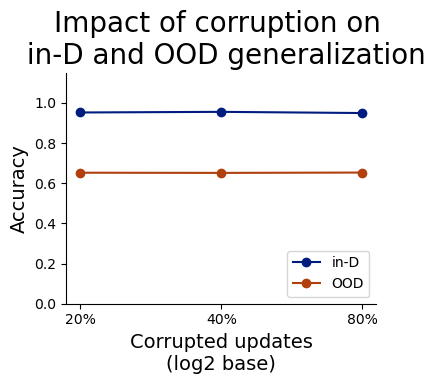

In [48]:
xs = [1,2,3]
ys = [0.9521, 0.9552, 0.9493]
ys_ood = [0.6522,0.6513,0.653]

fig = plt.figure(figsize=(4,3))
plt.plot(xs,ys, marker='o',label='in-D')
plt.plot(xs,ys_ood, marker='o', label = 'OOD')
plt.ylim(0,1.15)
plt.xticks([1,2,3],labels = ['20%','40%','80%'])
sns.despine()
plt.title('Impact of corruption on \n in-D and OOD generalization', fontsize=20)
plt.xlabel('Corrupted updates\n(log2 base)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc="lower right")
plt.show()